In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Hackylitics 2024 :)/Data/final_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4613003 entries, 0 to 4613002
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   match_id        object 
 2   shotX           float64
 3   shotY           float64
 4   quarter         object 
 5   time_remaining  object 
 6   player          object 
 7   team            object 
 8   made            bool   
 9   shot_type       object 
 10  distance        int64  
 11  score           object 
 12  opp             object 
 13  status          object 
 14  date            object 
dtypes: bool(1), float64(2), int64(2), object(10)
memory usage: 497.1+ MB


In [ ]:
#reading the data
data.head()

,Unnamed: 0,match_id,shotX,shotY,quarter,time_remaining,player,team,made,shot_type,distance,score,opp,status,date
0,0,200010310ATL,8.3,20.2,1st quarter,11:29.0,Baron Davis,CHH,False,2-pointer,22,0-2,'CHH',trails,10-31-2000
1,1,200010310ATL,35.9,15.8,1st quarter,10:41.0,Jamal Mashburn,CHH,False,2-pointer,16,0-2,'CHH',trails,10-31-2000
2,2,200010310ATL,24.0,5.0,1st quarter,10:38.0,Baron Davis,CHH,False,2-pointer,0,0-2,'CHH',trails,10-31-2000
3,3,200010310ATL,15.4,5.9,1st quarter,9:36.0,Elden Campbell,CHH,False,2-pointer,9,0-4,'CHH',trails,10-31-2000
4,4,200010310ATL,20.3,25.0,1st quarter,9:18.0,David Wesley,CHH,True,2-pointer,20,2-4,'CHH',trails,10-31-2000


## Data Cleaning & Preprocessing

In [ ]:
#Use the match id to get the date of the shot taken, and the team the person plays
def data_clean(data):
  #gets the date
  data['match_id'] = data['match_id'].str[:-4]
  #get the quarter
  data['quarter'] = data['quarter'].str[:1]
  #get the type of shot (2 or 3 pointer)
  data['shot_type'] = data['shot_type'].str[:1]
  #convert the date to an integer
  data['match_id'] = pd.to_numeric(data['match_id']).astype('Int64')
  #convert the quarter to an integer
  data['quarter'] = pd.to_numeric(data['quarter']).astype('Int64')
  #convert the shot type to an integer
  data['shot_type'] = pd.to_numeric(data['shot_type']).astype('Int64')
  #convert true or false to 0 and 1 for simplicity
  string_to_binary = {'leads': "1", 'trails': "0"}
  #convert status (we don't really need it tbh)
  data['status'] = data['status'].map(string_to_binary)
  data['status'] = pd.to_numeric(data['status']).astype('Int64')
  #Drop the unnecessary columns
  columns_to_drop = ["Unnamed: 0","team","opp","score", "time_remaining","date",'status']
  df = data.drop(columns=columns_to_drop, axis=1)
  df['made'] = df['made'].map({True: 1, False: 0})
  df['match_id'] = pd.to_numeric(df['match_id']).astype('Int64')
  return df


In [ ]:
clean_data = data_clean(data)

In [ ]:
clean_data.head()

,match_id,shotX,shotY,quarter,player,made,shot_type,distance
0,20001031,8.3,20.2,1,Baron Davis,0,2,22
1,20001031,35.9,15.8,1,Jamal Mashburn,0,2,16
2,20001031,24.0,5.0,1,Baron Davis,0,2,0
3,20001031,15.4,5.9,1,Elden Campbell,0,2,9
4,20001031,20.3,25.0,1,David Wesley,1,2,20


## Data Filtering

In [ ]:
#gets player input from user
def get_player_name():
  # Get user input for first name
  first_name = input("Enter your first name: ")

  # Get user input for last name
  last_name = input("Enter your last name: ")

  # Capitalize the first letter of each word
  capitalized_first_name = first_name.title()
  capitalized_last_name = last_name.title()

  name = capitalized_first_name + " " + capitalized_last_name
  return name


In [ ]:
player_name = get_player_name()

KeyboardInterrupt: Interrupted by user

In [ ]:
#checks if player exist
def is_player_present(df,name):
  if df[df["player"]==name] >0:
    return True
  else:
    return False



In [ ]:
def filter_shot():
  two_pt = input("Do you want 2-point shots? (y/n) ")
  three_pt = input("Do you want 3-point shots? (y/n) ")
  cap_two_pt = two_pt.title()
  cap_three_pt = three_pt.title()
  if cap_two_pt == 'Y' and cap_three_pt == 'Y':
    print("No need to filter by point-shot")
    result = 0
  elif cap_two_pt == 'Y':
    result = 2
  elif cap_three_pt == 'Y':
    result = 3
  print(result)
  return result






In [ ]:
shot_filter = filter_shot()

KeyboardInterrupt: Interrupted by user

In [ ]:
def filter_by_dates():
  all_dates = input("Do you want all dates? (y/n) ")
  cap_all_dates = all_dates.title()

  if(cap_all_dates == "N"):
    single_date = input("Do you want a single date?")
    cap_single_date = single_date.title()
    if cap_single_date =="N":
      print("giving you a range of dates to choose from")
      start_date = input("Give a start date (yyyymmdd)") #if 1 day performance, give day before
      end_date = input("Give an end date (yyyymmdd)") #if 1 day performance, give day of
      result = f"{start_date}:{end_date}"
      print(result)
  #lower_bound = int(start_date)
  #upper_bound = int(end_date)
    else:
      one_date = input("input your single date (yyyymmdd)")
      result = one_date
      print(result)
  #cond3 = (df['match_id'] >= lower_bound) & (df['match_id'] <= upper_bound)
  else:
    print("All dates in dataset are included")
    result = "ALL"
    print(result)
  return result


In [ ]:
filtered_date =filter_by_dates()

Do you want all dates? (y/n) n
Do you want a single date?n
giving you a range of dates to choose from
Give a start date (yyyymmdd)20051011
Give an end date (yyyymmdd)20051012
20051011:20051012


In [ ]:
def filter_by_dates():
  all_dates = input("Do you want all dates? (y/n) ")
  cap_all_dates = all_dates.title()
  parity2 = True

  if(cap_all_dates == "N"):
    start_date = input("Give a start date (yyyymmdd)") #if 1 day performance, give day before
    end_date = input("Give an end date (yyyymmdd)") #if 1 day performance, give day of
    lower_bound = int(start_date)
    upper_bound = int(end_date)
    cond3 = (df['match_id'] >= lower_bound) & (df['match_id'] <= upper_bound)
  else:
    print("All dates in dataset are included")
    parity2 = False



In [ ]:
clean_data

,match_id,shotX,shotY,quarter,player,made,shot_type,distance
0,20001031,8.3,20.2,1,Baron Davis,0,2,22
1,20001031,35.9,15.8,1,Jamal Mashburn,0,2,16
2,20001031,24.0,5.0,1,Baron Davis,0,2,0
3,20001031,15.4,5.9,1,Elden Campbell,0,2,9
4,20001031,20.3,25.0,1,David Wesley,1,2,20
...,...,...,...,...,...,...,...,...
4612998,20220321,21.7,10.2,4,Furkan Korkmaz,0,2,7
4612999,20220321,27.2,6.0,4,Tyrese Maxey,1,2,4
4613000,20220321,39.4,25.2,4,Tyrese Maxey,1,3,27
4613001,20220321,27.5,30.7,4,Tyrese Maxey,1,3,28


In [ ]:
clean_data[clean_data["player"]=="Kobe Bryant"]

,match_id,shotX,shotY,quarter,player,made,shot_type,distance
1229,20001031,40.7,12.2,1,Kobe Bryant,0,2,18
1230,20001031,8.3,5.0,1,Kobe Bryant,0,2,16
1234,20001031,13.9,18.5,1,Kobe Bryant,1,2,17
1236,20001031,37.8,22.5,1,Kobe Bryant,0,2,22
1248,20001031,24.0,5.0,2,Kobe Bryant,1,2,0
...,...,...,...,...,...,...,...,...
3319584,20160413,24.6,2.4,4,Kobe Bryant,1,2,0
3319585,20160413,23.3,3.2,4,Kobe Bryant,1,2,0
3319586,20160413,30.9,15.9,4,Kobe Bryant,1,2,14
3319587,20160413,0.8,14.0,4,Kobe Bryant,1,3,25


## Data Modeling

## Extra

In [ ]:
def cluster_user_preferences(data):
  final_data_frame = None

  #filter by name first
  name =get_player_name()
  #check if name exist in data_base
  if len(data[data["player"]==name]) > 0:
    print("Player in dataset...filtering player stats")
    #filter the dataframe for the player
    player_frame = data[data["player"]==name]
    print(player_frame.head())
    #filter for shot selection:
    shot_filter_num = filter_shot()
    #if you don't want to filter for shot types continue
    if shot_filter_num == 0:
      print ("no need to filter for shot type")
      player_frame_shot_filter = player_frame
      print(player_frame_shot_filter.head())
      #filter for 2 point or 3 point shots
    else:
      print(f"filtering for shot_type {shot_filter_num}")
      player_frame_shot_filter = player_frame[player_frame["shot_type"]==shot_filter_num]
      print(player_frame_shot_filter.head())
    #filter for days, range, or all data
    date = filter_by_dates()
    if date == "ALL":
      final_data_frame = player_frame_shot_filter
      return final_data_frame
      print(final_data_frame.head())
      #if it is just a single date
    elif ":" not in date:
      int_date = int(date)
      final_data_frame = player_frame_shot_filter[player_frame_shot_filter["match_id"]==int_date]
      print(final_data_frame.head())
      return final_data_frame
    elif ":" in date:
      date_range = date.split(':')
      lower_bound = int(date_range[0])
      upper_bound = int(date_range[1])
      bounded_dates = (player_frame_shot_filter['match_id'] >= lower_bound) & (player_frame_shot_filter['match_id'] <= upper_bound)
      final_data_frame = player_frame_shot_filter[bounded_dates]
      print(final_data_frame.head())
      return final_data_frame

  else:
    print("Player not in dataset so we can't perform analysis :(" )






In [ ]:
clean_data.tail()

,match_id,shotX,shotY,quarter,player,made,shot_type,distance
4612998,20220321,21.7,10.2,4,Furkan Korkmaz,0,2,7
4612999,20220321,27.2,6.0,4,Tyrese Maxey,1,2,4
4613000,20220321,39.4,25.2,4,Tyrese Maxey,1,3,27
4613001,20220321,27.5,30.7,4,Tyrese Maxey,1,3,28
4613002,20220321,14.7,6.3,4,Georges Niang,0,2,10


In [ ]:
clean_data[clean_data["match_id"]==20060122]

,match_id,shotX,shotY,quarter,player,made,shot_type,distance
1116108,20060122,39.8,14.5,1,Tracy McGrady,0,2,18
1116109,20060122,24.0,5.0,1,Dikembe Mutombo,1,2,0
1116110,20060122,11.0,19.1,1,Juwan Howard,0,2,19
1116111,20060122,11.5,8.0,1,David Wesley,0,2,13
1116112,20060122,4.6,21.8,1,David Wesley,0,3,26
...,...,...,...,...,...,...,...,...
1117577,20060122,22.2,6.2,4,Brendan Haywood,0,2,2
1117578,20060122,11.5,28.0,4,Antawn Jamison,0,3,26
1117579,20060122,38.0,9.6,4,Antonio Daniels,0,2,15
1117580,20060122,25.1,10.3,4,Brendan Haywood,1,2,5


In [ ]:
user_prefer_cluster_set = cluster_user_preferences(clean_data)

Enter your first name: Kevin
Enter your last name: Durant
Player in dataset...filtering player stats
         match_id  shotX  shotY  quarter        player  made  shot_type  \
1439707  20071031   18.6   31.1        1  Kevin Durant     0          3   
1439710  20071031   25.3   14.4        1  Kevin Durant     0          2   
1439711  20071031    9.1   10.1        1  Kevin Durant     0          2   
1439719  20071031   24.0    5.0        1  Kevin Durant     1          2   
1439722  20071031   24.0    5.0        1  Kevin Durant     0          2   

         distance  
1439707        27  
1439710         9  
1439711        16  
1439719         0  
1439722         0  
Do you want 2-point shots? (y/n) y
Do you want 3-point shots? (y/n) y
No need to filter by point-shot
0
no need to filter for shot type
         match_id  shotX  shotY  quarter        player  made  shot_type  \
1439707  20071031   18.6   31.1        1  Kevin Durant     0          3   
1439710  20071031   25.3   14.4        1  

In [ ]:
len(user_prefer_cluster_set)

184

In [ ]:
len(user_prefer_cluster_set[user_prefer_cluster_set["shot_type"]==3])

53

In [ ]:
user_prefer_cluster_set[["shotX","shotY"]]

,shotX,shotY
4416149,31.0,10.3
4416160,35.6,2.8
4416162,35.4,18.2
4416165,11.9,8.6
4416170,14.6,8.6
...,...,...
4420183,39.8,37.8
4420184,23.2,4.2
4420187,24.1,3.8
4420189,29.8,11.6


In [ ]:
user_prefer_cluster_set = user_prefer_cluster_set.drop('player', axis=1)

In [ ]:
pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00


In [ ]:

import ipywidgets as widgets
from IPython.display import display
from sklearn.cluster import DBSCAN

cartesian_coordinates =user_prefer_cluster_set[["shotX","shotY"]]
# Give a numerical category to player's name
#categorical = {name: 1}
#user_prefer_cluster_set['player'] = user_prefer_cluster_set['player'].map(categorical)

# Function to update clustering with new parameters
def update_clustering(epsilon, min_samples):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    y_pred = dbscan.fit_predict(cartesian_coordinates)



    # Plot the clustered data using different colors for each cluster
    unique_labels = np.unique(y_pred)
    for label in unique_labels:
      if label == -1:
        # Outliers (noise points) are red
        #plt.scatter(shotX[y_pred == label], shotY[y_pred == label], c='black', marker='x', label='Noise', s=50)
        print()
      else:
        # Inliers (clustered points) have different colors
        #plt.scatter(shotX[y_pred == label], shotY[y_pred == label], label=f'Cluster {label}', s=50)
        #plt.scatter(user_prefer_cluster_set["shotX"][y_pred == label], user_prefer_cluster_set["shotY"][y_pred == label], label=f'Cluster {label}', s=50)
        print()

    plt.figure(figsize=(8, 6))
    plt.scatter(user_prefer_cluster_set[["shotX"]], user_prefer_cluster_set[["shotY"]], c=y_pred, cmap='viridis', s=50, alpha=0.7)
    plt.title(f'DBSCAN Clustering (epsilon={epsilon}, min_samples={min_samples})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

# Create sliders for epsilon and min_samples
epsilon_slider = widgets.FloatSlider(value=0.5, min=.01, max=50, step=.001, description='Epsilon:')
min_samples_slider = widgets.IntSlider(value=5, min=1, max=50, step=1, description='Min Samples:')

# Interactive display
widgets.interactive(update_clustering, epsilon=epsilon_slider, min_samples=min_samples_slider)

interactive(children=(FloatSlider(value=0.5, description='Epsilon:', max=50.0, min=0.01, step=0.001), IntSlide…

In [ ]:
from joblib import dump

# Assuming model is your trained machine learning model object
dump(user_prefer_cluster_set, 'test_model.joblib')

['test_model.joblib']

In [ ]:
cartesian_coordinates =user_prefer_cluster_set[["shotX","shotY"]]

In [ ]:
def run_dbscan(epsilon, min_samples, cartesian_df):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    labels = dbscan.fit_predict(cartesian_df)
    return labels

In [ ]:
def update_clusters(epsilon, min_samples, cartesian_df):
    labels = run_dbscan(epsilon, min_samples, cartesian_df)
    # Plot clusters using Plotly or other plotting library

In [ ]:
s

In [ ]:
initial_epsilon = 0.1
initial_min_samples = 1

fig = go.Figure()
fig.add_trace(go.Scatter(x=cartesian_coordinates['shotX'], y=cartesian_coordinates['shotY'], mode='markers'))

epsilon_slider = FloatSlider(min=0.1, max=20, step=1, value=initial_epsilon, description='Epsilon:')
min_samples_slider = IntSlider(min=1, max=50, step=1, value=initial_min_samples, description='Min Samples:')

epsilon_slider.observe(slider_callback, names='value')
min_samples_slider.observe(slider_callback, names='value')

display(epsilon_slider)
display(min_samples_slider)

update_clusters(initial_epsilon, initial_min_samples, cartesian_coordinates)


FloatSlider(value=0.1, description='Epsilon:', max=20.0, min=0.1, step=1.0)

IntSlider(value=1, description='Min Samples:', max=50, min=1)

TypeError: update_clusters() missing 1 required positional argument: 'cartesian_df'

TypeError: update_clusters() missing 1 required positional argument: 'cartesian_df'

## My Old Code

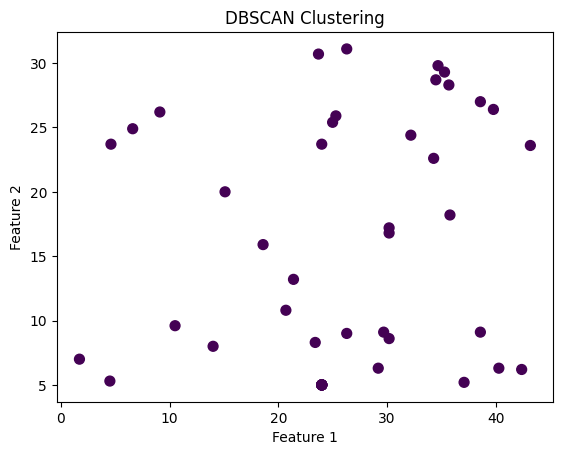

In [ ]:
#filtered_df
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Give a numerical category to player's name
categorical = {name: 1}
filter_df['player'] = filter_df['player'].map(categorical)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labelss = dbscan.fit_predict(filter_df)

# Plot the results
#plt.scatter(data[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(filter_df["shotX"], filter_df["shotY"], c=labelss, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

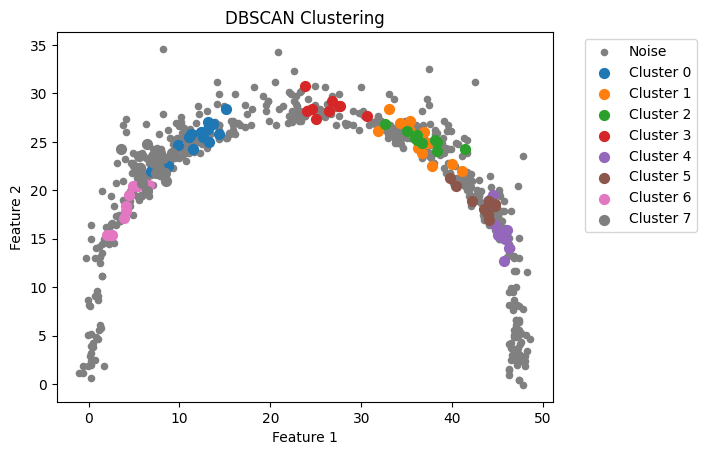

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate synthetic data
#X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply DBSCAN
#dbscan = DBSCAN(eps=5, min_samples=10)
dbscan = DBSCAN(eps=5, min_samples=9)
#dbscan = DBSCAN(eps=6, min_samples=10)

#dbscan = DBSCAN(eps=10, min_samples=5)
#dbscan = DBSCAN(eps=10, min_samples=15)
labelss = dbscan.fit_predict(filter_df)

# Plot the original data
#plt.scatter(filter_df["shotX"], filter_df["shotY"], c='gray', label='Original Data', edgecolors='k')

# Plot the clustered data using different colors for each cluster
unique_labels = np.unique(labelss)
for label in unique_labels:
    if label == -1:
        # Outliers (noise points) are red
        plt.scatter(shotX[labelss == label], shotY[labelss == label], c='grey', marker='o', label='Noise', s=20)
    else:
        # Inliers (clustered points) have different colors
        plt.scatter(shotX[labelss == label], shotY[labelss == label], label=f'Cluster {label}', s=50)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



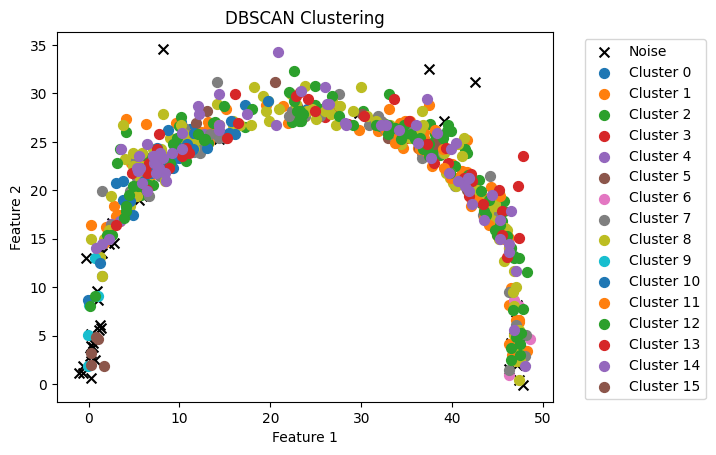

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import ipywidgets as widgets
from IPython.display import display
# Generate synthetic data
#X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5)
labelss = dbscan.fit_predict(filter_df)

# Plot the clustered data using different colors for each cluster
unique_labels = np.unique(labelss)
for label in unique_labels:
    if label == -1:
        # Outliers (noise points) are red
        plt.scatter(shotX[labelss == label], shotY[labelss == label], c='black', marker='x', label='Noise', s=50)
    else:
        # Inliers (clustered points) have different colors
        plt.scatter(shotX[labelss == label], shotY[labelss == label], label=f'Cluster {label}', s=50)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

interactive(children=(FloatSlider(value=0.1, description='Epsilon:', max=0.1, min=0.001, step=0.001), IntSlide…